In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_colwidth=500

In [16]:
df=pd.read_csv("CBK2020transformed.csv")
df = df.sample(frac=1).reset_index(drop=True)
df=df.drop(df.columns[[0]], axis = 1)
print(len(pd.DataFrame(df)))
df.head()

5383


,Device_Problems,Event_description,Narrative,Event_description_Narrative
0,Calibration_Problems,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to an authorized resmed third party service center for an evaluation and service. The non-return valve (nrv) assembly was replaced to address this issue. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. Resmed reference #: (b)(4). Report late due to transition from vmsr program. Establishment was unaware of fda letter dated 16 september 2019 for cbk procode status change in vmsr program until notified directly by fda on 18 december 20...,It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.The device was returned to an authorized resmed third party service center for an evaluation and service. The non-return valve (nrv) assembly was replaced to address this issue. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. Resmed reference #: (b)(4). Report late due to transition from...
1,Circuit_failure,It was reported to resmed that an astral device had an unresponsive touchscreen. There was no patient harm or a serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The lcd module was replaced to address the issue. The device was serviced and fully tested before it was returned to the customer. Resmed reference#: (b)(4).,It was reported to resmed that an astral device had an unresponsive touchscreen. There was no patient harm or a serious injury reported as a result of this incident.The device was returned to resmed and an evaluation confirmed the complaint. The lcd module was replaced to address the issue. The device was serviced and fully tested before it was returned to the customer. Resmed reference#: (b)(4).
2,Mechanical_Problems,"The customer reported to vyaire medical that the vela ventilator has touchscreen issues. At this time, there is no information regarding patient involvement associated with the reported event.","Vyaire medical file identification: (b)(4). At this time, the suspect device has not been returned for evaluation. Therefore, root cause has not been determined yet. Vyaire medical will submit a supplemental report in accordance with 21 cfr section 803. 56 if additional information was received.","The customer reported to vyaire medical that the vela ventilator has touchscreen issues. At this time, there is no information regarding patient involvement associated with the reported event.Vyaire medical file identification: (b)(4). At this time, the suspect device has not been returned for evaluation. Therefore, root cause has not been determined yet. Vyaire medical will submit a supplemental report in accordance with 21 cfr section 803. 56 if additional information was received."
3,Calibration_Problems,"Complainant alleged that while attempting to treat a patient (age & gender unknown), the device displayed a ""runtime calibration failure - 1051"" error message. Complainant did not indicate that there was any adverse effect to the patient due to the reported malfunction.",Zoll medical corporation has not received the device for evaluation and this complaint is still under investigation.,"Complainant alleged that while attempting to treat a patient (age & gender unknown), the device displayed a ""runtime calibration failure - 1051"" error message. Complainant did not indicate that there was any adverse effect to the patient due to the reported malfunction.Zoll medical corporation has not received the device for evaluation and this complaint is still under investigation."
4,Calibration_Problems,It was reported to resmed that an astral device failed to complete its inte

In [26]:
DI=0      # desired initial index
DE=5383   # desired end index
#Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values.
# in list form
P_P_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Power_Problems').dropna()))[:24]
C_F_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Circuit_failure').dropna()))[:24]
M_P_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Mechanical_Problems').dropna()))[:24]
S_P_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Software_Problems').dropna()))[:24]
C_P_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Calibration_Problems').dropna()))[:24]
num_P_P = len(P_P_list)
print(P_P_list)
print("A total of " + str(num_P_P) + " Power_Problems have been collected")

['It was reported to resmed that an astral device failed to charge its internal battery. There was no patient harm or serious injury reported as a result of this incident.The device was returned to resmed and an evaluation confirmed the complaint. The internal battery was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Based on all available evidence and complaint investigations of a similar nature, an investigation determined that the reported complaint was due to an isolated component failure within the device battery assembly. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).', 'It was reported to resmed that an astral device failed to charge its internal battery. There was no patient harm or serious injury reported as a result of this incident.The device was returned to resmed for an engineering investigation. The investigation methods, results, and conclusion are not finalized

In [27]:
# label Documents as Document_1, Document_2 .. Document_n
Documentids = ["Document_" + str(i) for i in range(num_P_P)]

# create a dictionary
Document_dict = dict(zip(Documentids, P_P_list))

# get all the book ids in a list
ids = list(Document_dict.keys())
#print((ids))

# create all possible pairs
pairs = []
# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        pairs.append((ids[i], j))

print("There are a total of " + str(len(pairs)) + " pairs")
print("Displaying first 10 pairs: ")
display(pairs[:10])
print("....")
print("Displaying last 10 pairs: ")
display(pairs[-10:])

There are a total of 276 pairs
Displaying first 10 pairs: 


[('Document_0', 'Document_1'),
 ('Document_0', 'Document_2'),
 ('Document_0', 'Document_3'),
 ('Document_0', 'Document_4'),
 ('Document_0', 'Document_5'),
 ('Document_0', 'Document_6'),
 ('Document_0', 'Document_7'),
 ('Document_0', 'Document_8'),
 ('Document_0', 'Document_9'),
 ('Document_0', 'Document_10')]

....
Displaying last 10 pairs: 


[('Document_19', 'Document_20'),
 ('Document_19', 'Document_21'),
 ('Document_19', 'Document_22'),
 ('Document_19', 'Document_23'),
 ('Document_20', 'Document_21'),
 ('Document_20', 'Document_22'),
 ('Document_20', 'Document_23'),
 ('Document_21', 'Document_22'),
 ('Document_21', 'Document_23'),
 ('Document_22', 'Document_23')]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df_hm, xlabels, ylabels):
    """
    Given a dataframe containing similarity grid, plot the heatmap
    """
    sns.set(style="white")

    # Set up the matplotlib figure
    # (to enlarge the cells, increase the figure size)
    f, ax = plt.subplots(figsize=(8, 8))

    # Generate a custom diverging colormap
    #cmap = sns.color_palette("rocket_r", as_cmap=True)
    #"magma"
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_hm, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df_hm, mask=mask, cmap=cmap, center=1,
            xticklabels=xlabels, yticklabels=ylabels,
            square=True, linewidths=.005, fmt='.2f', vmax=1)

    ax.set_title("Cosine similarity scores Power_Problems documents").set_fontsize(15)
    ax.set_xlabel("")
    ax.set_ylabel("")

    return ax



##############################
#  Module: normalization.py
#  Author: Shravan Kuchkula
#  Date: 07/19/2019
##############################

import re
import pandas as pd
import numpy as np
import nltk
import string
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

# tokenize text
def tokenize_text(book_text):
    TOKEN_PATTERN = r'\s+'
    regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=True)
    word_tokens = regex_wt.tokenize(book_text)
    return word_tokens

def remove_characters_after_tokenization(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    return filtered_tokens

def convert_to_lowercase(tokens):
    return [token.lower() for token in tokens if token.isalpha()]

def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    #stopword_list =Circuit_failure_stopwords
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

def apply_lemmatization(tokens, wnl=WordNetLemmatizer()):
    return [wnl.lemmatize(token) for token in tokens]

def cleanTextBooks(book_texts):
    clean_books = []
    for book in book_texts:
        book_i = tokenize_text(book)
        book_i = remove_characters_after_tokenization(book_i)
        book_i = convert_to_lowercase(book_i)
        book_i = remove_stopwords(book_i)
        book_i = apply_lemmatization(book_i)
        clean_books.append(book_i)
    return clean_books



In [29]:
# cleanTextBooks takes a list of strings and returns a list of lists
corpus = cleanTextBooks(P_P_list)
# convert list of lists into a list of strings
norm_Document_corpus = [' '.join(text) for text in corpus]

# display normalized corpus
display(norm_Document_corpus)

['reported resmed astral device failed charge internal battery patient harm serious injury reported result incidentthe device returned resmed evaluation confirmed complaint internal battery replaced address issue device serviced fully tested returned customer based available evidence complaint investigation similar nature investigation determined reported complaint due isolated component failure within device battery assembly resmeds risk analysis failure mode concludes risk acceptable',
 'reported resmed astral device failed charge internal battery patient harm serious injury reported result incidentthe device returned resmed engineering investigation investigation method result conclusion finalized stage information available supplemental report submitted resmed reference',
 'reported resmed astral device power source detection issue patient harm serious injury reported result incidentthe device returned resmed evaluation confirmed complaint main circuit board replaced address issue 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
vectorizer

TfidfVectorizer(min_df=0.0)

In [31]:
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=np.float64, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

TfidfVectorizer(min_df=0.0)

In [32]:
# calculate the feature matrix
feature_matrix = vectorizer.fit_transform(norm_Document_corpus).astype(float)

# display the shape of feature matrix
display(feature_matrix.shape)

# display the first feature vector
display(feature_matrix[0])

# display the dense version of the feature vector
display(feature_matrix.toarray()[0])

# display the shape of dense feature vector
display(feature_matrix.toarray()[0].shape)

# display the first document text
display(norm_Document_corpus[0])

(24, 229)

<1x229 sparse matrix of type '<class 'numpy.float64'>'
	with 44 stored elements in Compressed Sparse Row format>

array([0.        , 0.13872147, 0.12083412, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.12902899, 0.1874328 ,
       0.        , 0.07366381, 0.        , 0.        , 0.10747389,
       0.        , 0.13872147, 0.24095298, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12083412,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.29041783,
       0.        , 0.1505841 , 0.13872147, 0.        , 0.        ,
       0.        , 0.09218029, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07366381, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13872147, 0.26009628, 0.        , 0.        ,
       0.        , 0.        , 0.12902899, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

(229,)

'reported resmed astral device failed charge internal battery patient harm serious injury reported result incidentthe device returned resmed evaluation confirmed complaint internal battery replaced address issue device serviced fully tested returned customer based available evidence complaint investigation similar nature investigation determined reported complaint due isolated component failure within device battery assembly resmeds risk analysis failure mode concludes risk acceptable'

In [33]:
def compute_cosine_similarity(pair):

    # extract the indexes from the pair
    book1, book2 = pair

    # split on _ and get index
    book1_index = int(book1.split("_")[1])
    book2_index = int(book2.split("_")[1])

    # get the feature matrix of the document
    book1_fm = feature_matrix.toarray()[book1_index]
    book2_fm = feature_matrix.toarray()[book2_index]

    # compute cosine similarity manually
    manual_cosine_similarity = np.dot(book1_fm, book2_fm)

    return manual_cosine_similarity

In [34]:
pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]

# create a dataframe
df = pd.DataFrame({'pair': pairs, 'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

,pair,similarity
0,"(Document_0, Document_1)",0.390175
1,"(Document_0, Document_2)",0.780384
2,"(Document_0, Document_3)",0.202067
3,"(Document_0, Document_4)",0.207278
4,"(Document_0, Document_5)",0.040838


,pair,similarity
271,"(Document_20, Document_22)",0.167936
272,"(Document_20, Document_23)",0.199805
273,"(Document_21, Document_22)",0.093386
274,"(Document_21, Document_23)",0.175345
275,"(Document_22, Document_23)",0.072348


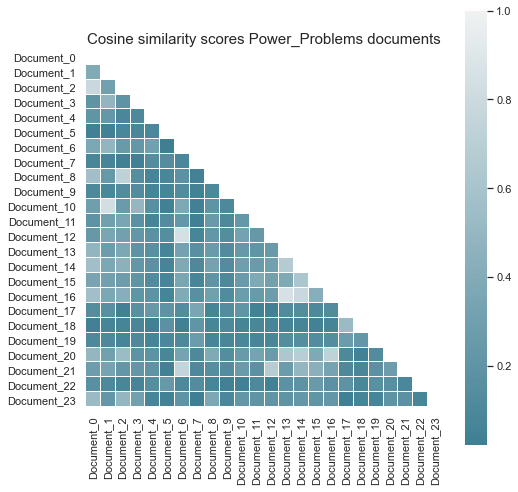

In [35]:
# initialize an empty dataframe grid
df_hm = pd.DataFrame({'ind': range(num_P_P), 'cols': range(num_P_P), 'vals': pd.Series(np.zeros(num_P_P))})

# convert to a matrix
df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)

# make a copy
df_temp = df.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)

# add two columns to df_temp
df_temp['Doucument1'] = list1
df_temp['Doucument2'] = list2

# drop the pair as it not needed
df_temp.drop('pair', axis=1, inplace=True)

# extract index so that you can construct pairs
df_temp['Doucument1'] = df_temp['Doucument1'].apply(lambda x: int(x.split('_')[-1]))
df_temp['Doucument2'] = df_temp['Doucument2'].apply(lambda x: int(x.split('_')[-1]))

# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.Doucument1, df_temp.Doucument2, round(df_temp.similarity, 2)))

# display(df_temp.head())

# to get lower diagnol, swap the rows and cols.
for row, col, similarity in df_temp.pairs:
    df_hm.iloc[col, row] = similarity

ax = plot_heatmap(df_hm, ids, ids)

In [36]:
df.loc[[df.similarity.values.argmax(), df.similarity.values.argmin()]]

,pair,similarity
223,"(Document_13, Document_16)",0.862946
155,"(Document_7, Document_23)",0.021861


In [37]:
print("Most similar books are: ")
print(Document_dict['Document_13'])
print(" and ")
print(Document_dict['Document_16'])

Most similar books are: 
It was reported that an astral device displayed a battery error message repeatedly. There was no patient harm or serious injury reported as result of this incident.The device was returned and an evaluation confirmed the complaint. The internal battery was replaced to resolve the issue. The device was serviced and fully tested before it was returned to the customer. (b)(4).
 and 
It was reported to resmed that an astral device displayed an internal battery error message. There was no patient harm or serious injury reported as a result of this incident.The device was returned and an evaluation confirmed the complaint. The internal battery was replaced to address the issue. The device was serviced and fully tested before it was returned to the customer. (b)(4).


In [38]:
print("Most dissimilar books are: ")
print(Document_dict['Document_7'])
print(" and ")
print(Document_dict['Document_23'])

Most dissimilar books are: 
The customer reported battery needs replaced. It is unknown if the ventilator was being used on a patient at the time that the error was discovered. Confirmation has been requested.Date of event: (b)(6) 2020. Date of report: 24apr2020.
 and 
It was reported to resmed that an astral device did not power on. There was no patient harm or a serious injury reported as a result of this incident.Visual inspection during evaluation of the device revealed broken parts inside the device, damage to the device chassis and bottom case. Based on all available evidence, an investigation determined that the reported complaint was due to physical damage. Resmeds risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).
